In [1]:
import glacierml as gl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from tqdm import tqdm
from matplotlib import ticker

pd.set_option('display.max_columns', None)


In [2]:
# parameterization_list = [1,2,3,4]
parameterization = '3'
threshold = '0.75'
data = gl.load_notebook_data(parameterization)

In [3]:
df = data
data_1 = df['Farinotti Mean Thickness'] / 1e3 * df['Area']
vol_f = data_1

data_2 = df['Edasi Mean Thickness'] / 1e3 * df['Area']
vol_e = data_2

x_1 = np.sort(data_1)
y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

x_2 = np.sort(data_2)
y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

xy = np.vstack([np.log10(vol_f),np.log10(vol_e)])

In [4]:
z = gaussian_kde(xy)(xy)

bins_x = np.logspace(np.log10(np.min(vol_f)), np.log10(np.max(vol_f)), 25)
bins_y = np.logspace(np.log10(np.min(vol_e)), np.log10(np.max(vol_e)), 25)

In [5]:
def scatter_hist(vol_f, vol_e, data_1, ax, 
                 ax_histx, ax_histy
                ):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False, size = 36)
    ax_histy.tick_params(axis="y", labelleft=False, size = 36)

    # the scatter plot:
    ax.scatter(vol_f, vol_e, 
               c = (z), 
               s = 100,
               cmap = 'viridis',
               marker = '.'
              )
    ax.plot(
        (vol_e.min(),vol_e.max()),
        (vol_e.min(),vol_e.max()),
        '-',
        c = 'orange'

    )
    ax_histx.hist(
        (vol_f), 
        bins = bins_x,
        edgecolor = 'black',
        log = True
    )

    ax_histy.hist(
        (vol_e), 
        bins = bins_y, 
        edgecolor = 'black',
        orientation='horizontal',
        log = True
    )
    ax_histx.tick_params(axis="x", labelsize=36)
    ax_histy.tick_params(axis="y", labelsize=36)


Drawing scatter plot...
Drawing done
Setting scales and labels...
Saving....


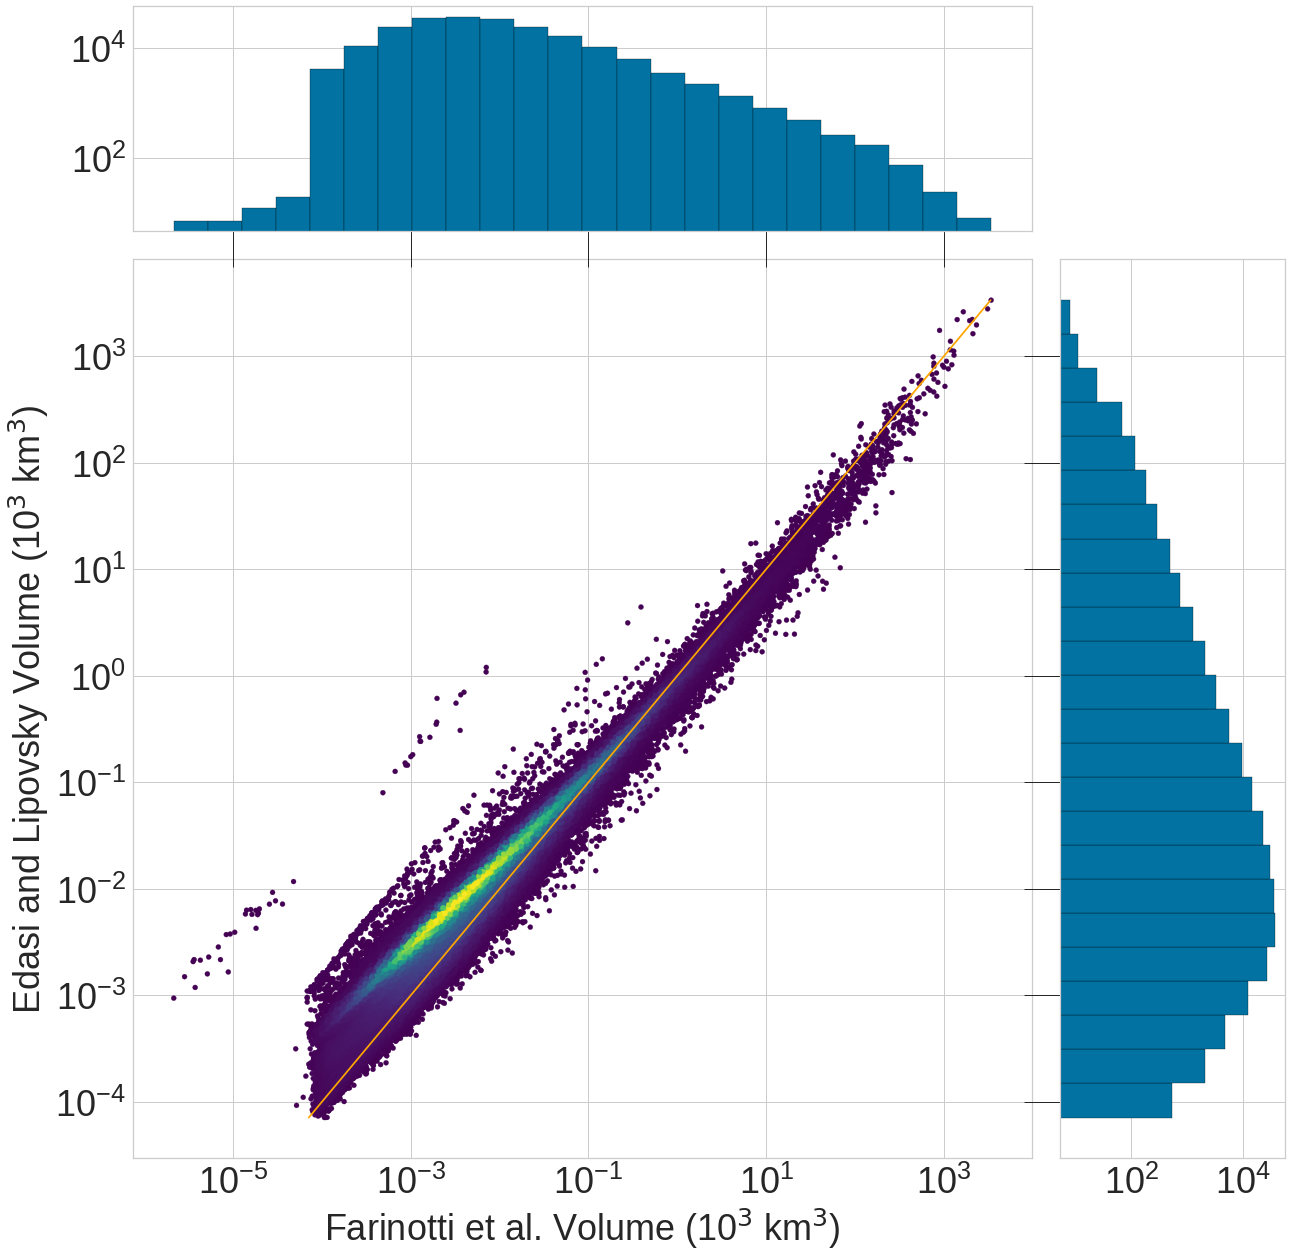

In [7]:
fig = plt.figure(figsize=(20,20))
# plt.suptitle(
#     'Edasi & Lipovsky vs. Farinotti et al. 2019\nGlobal Non-Ice Sheet Glacier Volume\n'+
#     'Size and Distance Threshold = ' + threshold,
# #     'Glaciers With Area <= Median Area\n' ,
# #     'Can Reject Null Hypothesis That Glacier Thickness is Normally Distributed',
#     y = 0.99, fontsize = 38)
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)


# Create the Axes.

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex = ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey = ax)


ax_histx.tick_params(axis="y", labelsize=36)
ax_histy.tick_params(axis="x", labelsize=36)

ax.tick_params(axis="both", labelsize=36)


# Draw the scatter plot and marginals.
print('Drawing scatter plot...')
scatter_hist(
    vol_f, 
    vol_e,
    data,
    ax, 
    ax_histx,
    ax_histy,
)

print('Drawing done')
print('Setting scales and labels...')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Edasi and Lipovsky Volume (10$^3$ km$^3$)', fontsize = 36)
ax.set_xlabel('Farinotti et al. Volume (10$^3$ km$^3$)', fontsize = 36)
# ax.set_ylim(10**-4, 10**5)
# ax.set_xlim(10**-6, 10**4)

print('Saving....')
# plt.show
# plt.savefig('figs/scatter/scatter_hist_df8.eps')
# plt.savefig('figs/scatter/scatter_hist_df8.svg')
plt.savefig('figs/scatter/scatter_hist_' + parameterization + '.png')
# plt.savefig('figs/scatter/test.svg')
